### Test residual block 


In [36]:
from eeg_net.eeg_resnet import * 
from eeg_net.eeg_net_base import *
import numpy as np 
import matplotlib.pyplot as plt 
%load_ext autoreload
%autoreload 2
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
conv= conv3x3(in_channels=32, out_channels=64)
print(conv)
dummy = torch.ones((1,1,1,1))
print(dummy)
block = ResidualBlock(1,64)
block(dummy)

Conv2dAuto(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
tensor([[[[1.]]]])


tensor([[[[2.]]]])

In [25]:
dummy = torch.ones((1,32,224,224))
block = ResNetBasicBlock(32,64)
print(block(dummy).shape)
print(block)

torch.Size([1, 64, 224, 224])
ResNetBasicBlock(
  (blocks): Sequential(
    (0): Sequential(
      (0): Conv2dAuto(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ReLU()
    (2): Sequential(
      (0): Conv2dAuto(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (activate): ReLU()
  (shortcut): Sequential(
    (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


### ResNoteBottleNeckBlock test 

In [26]:
dummy = torch.ones((1,32,10,10))
block = ResNetBottleNeckBlock(32,64)
block(dummy).shape
print(block)

ResNetBottleNeckBlock(
  (blocks): Sequential(
    (0): Sequential(
      (0): Conv2dAuto(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ReLU()
    (2): Sequential(
      (0): Conv2dAuto(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (3): ReLU()
    (4): Sequential(
      (0): Conv2dAuto(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (activate): ReLU()
  (shortcut): Sequential(
    (0): Conv2d(32, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


### ResNetLayer test 

In [27]:
dummy = torch.ones((1, 64, 48, 48))

layer = ResNetLayer(64, 128, block=ResNetBasicBlock, n=3)
layer(dummy).shape

torch.Size([1, 128, 24, 24])

In [28]:
X_test = np.load("data/X_test.npy")
y_test = np.load("data/y_test.npy")
person_train_valid = np.load("data/person_train_valid.npy")
X_train_valid = np.load("data/X_train_valid.npy")
y_train_valid = np.load("data/y_train_valid.npy")
person_test = np.load("data/person_test.npy")

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))
X_test_dir = './data/X_test.npy'
y_test_dir = './data/y_test.npy' 
X_train_valid_dir = './data/X_train_valid.npy' 
y_train_valid_dir = './data/y_train_valid.npy'


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [44]:
model = EEGResNet(1,4)
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1 
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir,device='cpu')
train_loader= train_val_data['train']
val_loader = train_val_data['val']
x ,y = [],[]
for data in train_loader:
    x,y = data 
    break 



Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.573665
0	1.456697	0.269542	1.485342	0.252955	
--Iter 49	1.530067
1	1.421192	0.309215	1.488714	0.248227	
--Iter 49	1.389772
2	1.472812	0.264572	1.507847	0.234043	
--Iter 49	1.274355
3	1.500765	0.240229	1.451138	0.293144	
--Iter 49	1.430299
4	1.474228	0.265667	1.507468	0.236407	
--Iter 49	1.523578
5	1.481145	0.260192	1.491720	0.248227	
--Iter 49	1.428022
6	1.449163	0.288494	1.489462	0.250591	
--Iter 49	1.411196
7	1.432167	0.310310	1.451670	0.290780	
--Iter 49	1.487928
8	1.433301	0.298939	1.387224	0.349882	
--Iter 49	1.438389
9	1.459282	0.278302	1.497350	0.241135	
--Iter 49	1.528223
10	1.456073	0.283777	1.420277	0.312057	
--Iter 49	1.325093
11	1.409272	0.330020	1.436761	0.302600	
--Iter 49	1.433568
12	1.418330	0.317301	1.457440	0.274232	
--Iter 49	1.463777
13	1.407318	0.329768	1.404415	0.333333	
--Iter 49	1.406274
14	1.377001	0.341813	1.400113	0.271868	
--Iter 49	1.224266
15	1.349115	0.364050	1.331262	0.399527	
-

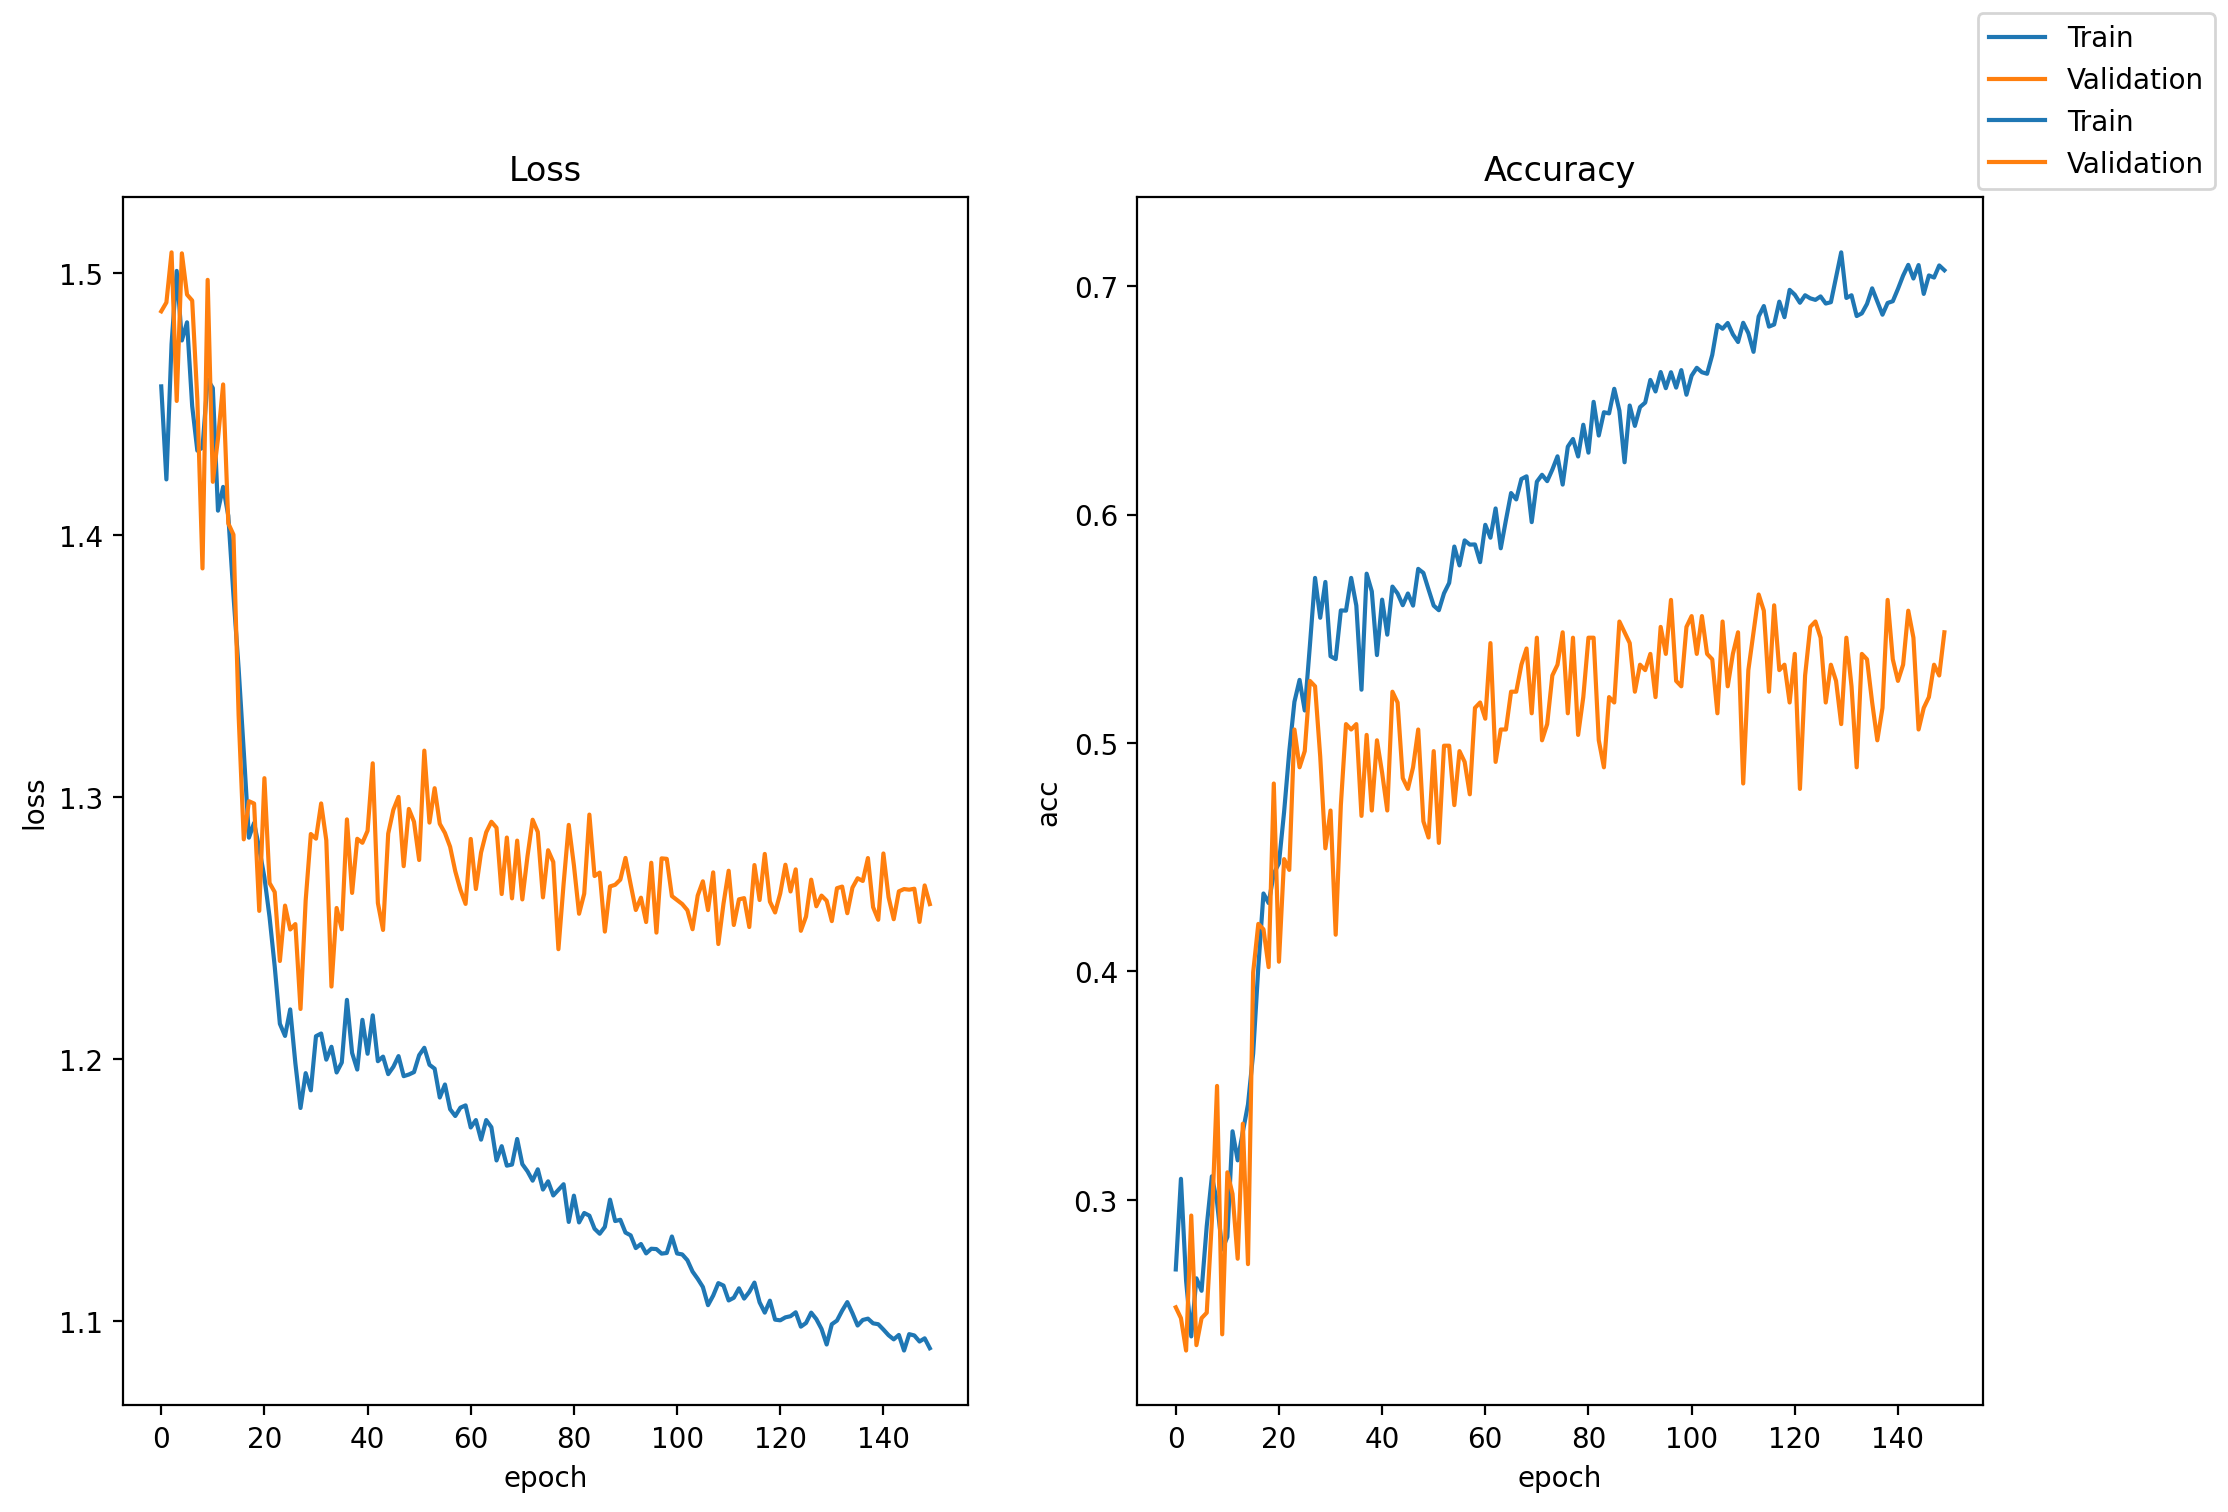

In [49]:
model = EEGResNet(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 100,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-3,
    'epoch_num': 150,
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)


### Data Preprocess 
#### shift_positive

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.454179
0	1.461863	0.270300	1.504981	0.238771	
--Iter 49	1.389831
1	1.459021	0.282008	1.458511	0.276596	
--Iter 49	1.431007
2	1.429414	0.307867	1.455208	0.283688	
--Iter 49	1.430853
3	1.397601	0.342908	1.445986	0.290780	
--Iter 49	1.396416
4	1.431622	0.305425	1.453444	0.290780	
--Iter 49	1.529305
5	1.460345	0.275101	1.499812	0.243499	
--Iter 49	1.360487
6	1.457721	0.282850	1.476018	0.264775	
--Iter 49	1.395114
7	1.428862	0.311573	1.461860	0.281324	
--Iter 49	1.343743
8	1.424791	0.311742	1.537453	0.200946	
--Iter 49	1.534337
9	1.498321	0.228015	1.504052	0.219858	
--Iter 49	1.403824
10	1.381194	0.332379	1.404238	0.319149	
--Iter 49	1.479755
11	1.420547	0.305425	1.453210	0.276596	
--Iter 49	1.292943
12	1.381021	0.352510	1.406537	0.321513	
--Iter 49	1.391136
13	1.393233	0.337854	1.432311	0.286052	
--Iter 49	1.241749
14	1.381107	0.350573	1.400374	0.302600	
--Iter 49	1.342056
15	1.366317	0.366240	1.390857	0.319149	
-

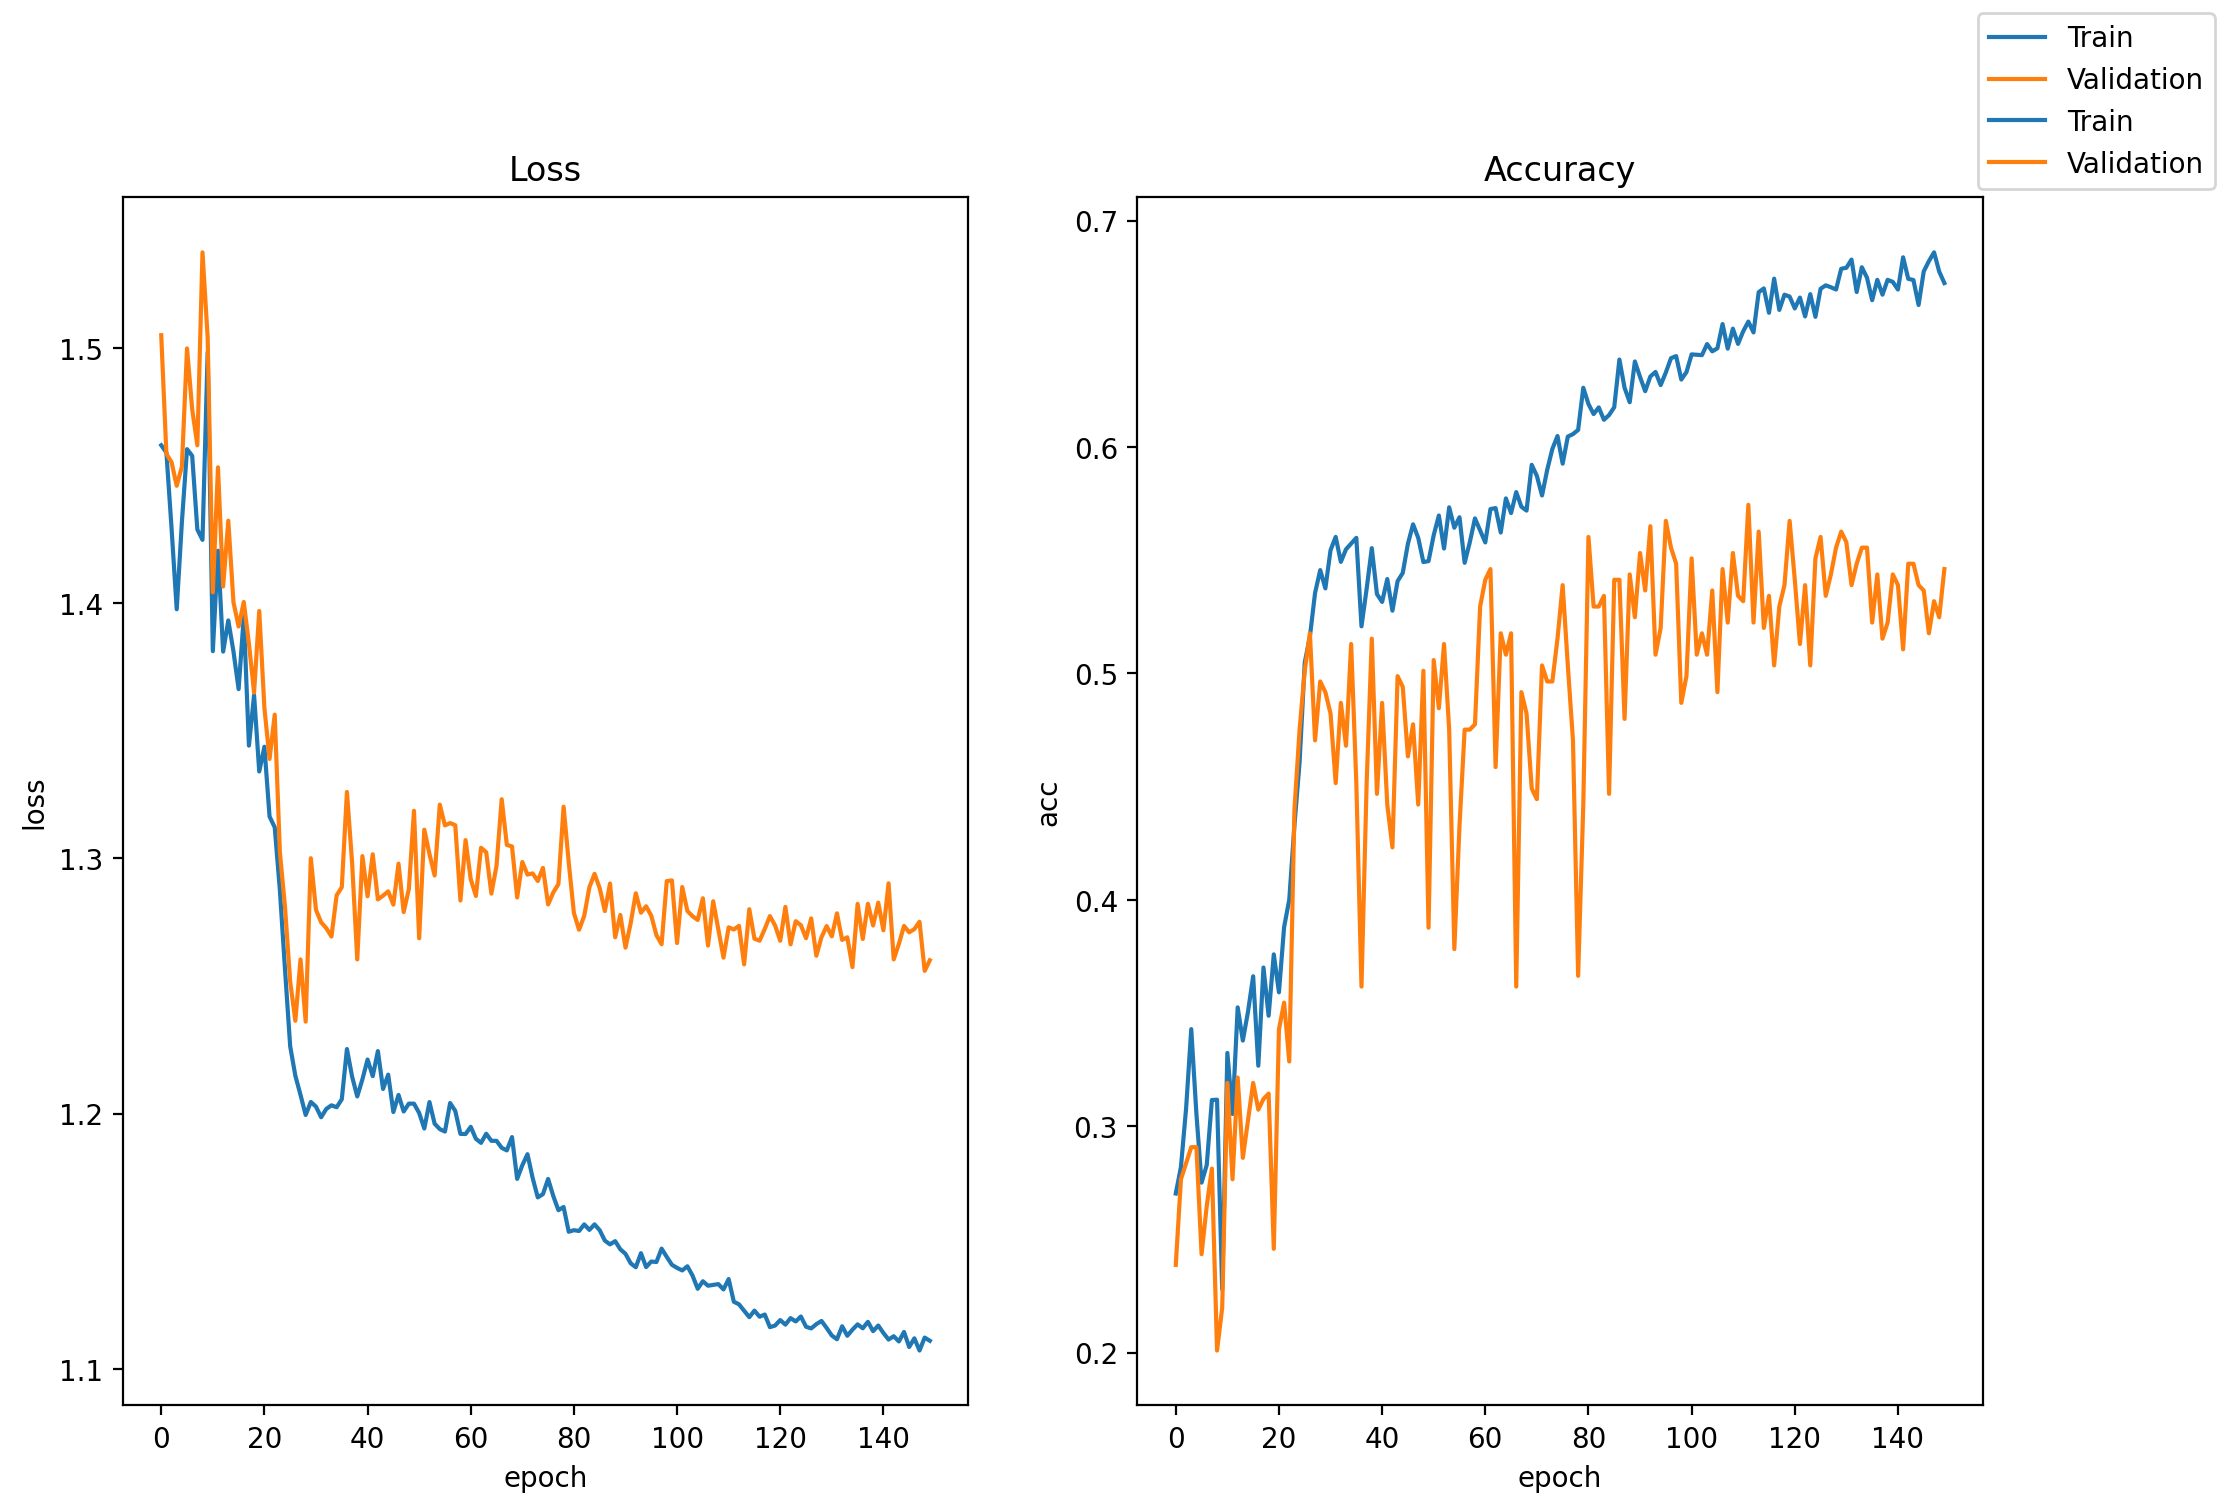

In [51]:
model = EEGResNet(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-3,
    'epoch_num': 150,
    'transform': 'shift_psitive'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

In [52]:
model = EEGResNet(1,4).to('cuda')
options = {
    'train_batch_size': 32,
    'scheduler_patience': 80,
    'weight_decay': 0.15,
    'val_batch_size': 1,
    'learning_rate': 1e-3,
    'epoch_num': 150,
    'transform': 'square'
}
train_val_data = eeg_train_val_loader(
    X_train_valid_dir, y_train_valid_dir)
loss_fn = nn.CrossEntropyLoss()
logs,_= train(model, options, loss_fn,
        data_dir=X_train_valid_dir,
        label_dir=y_train_valid_dir,
        preload_gpu=True)

Start training...
Epoch	Train Loss	Train Acc	Test Loss	Test_Acc	
--Iter 49	1.447949
0	1.460352	0.251263	1.503111	0.241135	
--Iter 49	1.540220
1	1.472869	0.264319	1.525330	0.215130	
--Iter 49	1.517495
2	1.487141	0.251685	1.440340	0.250591	
--Iter 49	1.469758
3	1.474667	0.255896	1.467940	0.267139	
--Iter 49	1.554345
4	1.508274	0.231637	1.497103	0.243499	
--Iter 49	1.428878
5	1.462670	0.277375	1.494752	0.250591	
--Iter 49	1.570538
6	1.487613	0.250590	1.470902	0.269504	
--Iter 49	1.534467
7	1.478148	0.255391	1.455658	0.288416	
--Iter 49	1.521286
8	1.474806	0.263982	1.510381	0.226950	
--Iter 49	1.391021
9	1.485348	0.252106	1.500522	0.224586	
--Iter 49	1.431217
10	1.463937	0.274175	1.480228	0.264775	
--Iter 49	1.436332
11	1.449026	0.289757	1.453335	0.245863	
--Iter 49	1.485501
12	1.458345	0.278892	1.478316	0.255319	
--Iter 49	1.412016
13	1.405730	0.280576	1.396148	0.274232	
--Iter 49	1.406990
14	1.371363	0.307783	1.381080	0.293144	
--Iter 49	1.398769
15	1.371574	0.319239	1.404816	0.278960	
-

KeyboardInterrupt: 

In [16]:
from torchsummary import summary
summary(model.cuda(),(1,22,1000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 32, 22, 976]             832
         MaxPool2d-2           [-1, 32, 22, 96]               0
            Conv2d-3           [-1, 64, 22, 96]           2,048
       BatchNorm2d-4           [-1, 64, 22, 96]             128
        Conv2dAuto-5           [-1, 64, 22, 96]          18,432
       BatchNorm2d-6           [-1, 64, 22, 96]             128
          Identity-7           [-1, 64, 22, 96]               0
        Conv2dAuto-8           [-1, 64, 22, 96]          36,864
       BatchNorm2d-9           [-1, 64, 22, 96]             128
         Identity-10           [-1, 64, 22, 96]               0
 ResNetBasicBlock-11           [-1, 64, 22, 96]               0
       Conv2dAuto-12           [-1, 64, 22, 96]          36,864
      BatchNorm2d-13           [-1, 64, 22, 96]             128
         Identity-14           [-1, 64,